<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EC%A4%91%EA%B8%89)_5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GNUVILL 인공지능 스터디(중급) 5주차 과제: 로지스틱 회귀

e-commerce 데이터 분석해보기

---

##1. 라이브러리

In [1]:
import pandas as pd
import numpy as np

## 2. 데이터 준비하기

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales.csv to sales.csv


In [3]:
import io
sales = pd.read_csv(io.BytesIO(uploaded['sales.csv']))

In [4]:
sales

,acctAge,visitsMonth,spendToDate,spendMonth,satSite,satQuality,satPrice,satOverall,region,coupon,purchase
0,21,9,21,21,6,5,6,6,Mideast,0,0
1,9,9,55,55,4,5,4,4,Southwest,0,0
2,16,7,64,17,6,6,7,7,Mideast,1,0
3,4,8,61,8,6,6,6,6,Southwest,1,0
4,16,6,27,9,5,5,6,6,Midwest,0,0
...,...,...,...,...,...,...,...,...,...,...,...
830,9,10,50,54,8,9,9,8,Mideast,1,1
831,7,6,27,6,6,7,6,5,Southwest,0,0
832,20,12,23,12,6,6,6,5,Mideast,0,0
833,5,9,19,6,6,7,6,6,Midwest,0,0


In [5]:
sales.describe()

,acctAge,visitsMonth,spendToDate,spendMonth,satSite,satQuality,satPrice,satOverall,coupon,purchase
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,12.835928,7.180838,125.943713,34.200000,5.714970,6.010778,5.756886,5.695808,0.338922,0.031138
std,5.778539,2.233303,203.160745,66.813617,1.532291,1.608171,1.601726,1.647880,0.473627,0.173794
min,1.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,8.000000,6.000000,28.000000,9.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000
50%,13.000000,7.000000,45.000000,17.000000,6.000000,6.000000,6.000000,6.000000,0.000000,0.000000
75%,18.000000,9.000000,100.500000,34.000000,7.000000,7.000000,7.000000,7.000000,1.000000,0.000000
max,24.000000,15.000000,1196.000000,1041.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000


835명의 데이터로, 각 변수가 가리키는 것은 다음과 같다.
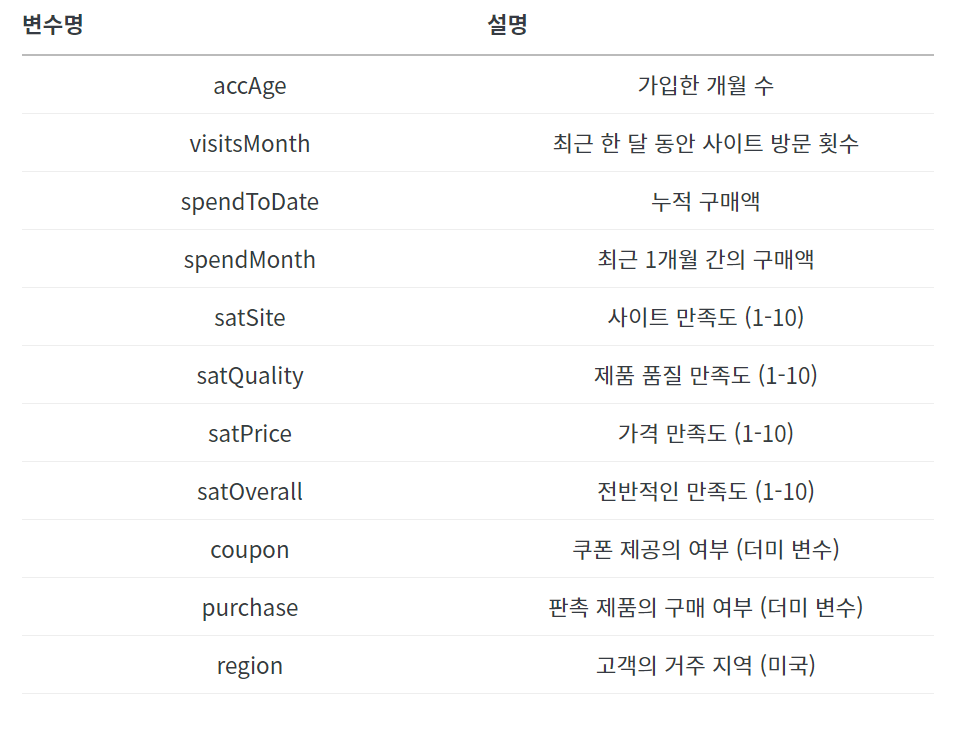

## 3-1. Q1. 쿠폰을 제공하는 것이 구매 여부에 영향을 미칠까?

*   **가설: 쿠폰 제공이 구매 여부에 영향을 미친다!**
*   구매 여부는 **Yes/No**의 이산적 카테고리





*   **statsmodels.api**: 통계 모듈을 사용하는 라이브러리
*   **model.summary**: model에 대한 요약된 정보
*   **np.exp()**: 밑(base)이 자연상수 e 인 지수함수로 변환해주는 함수

---

  GLM은 일반적 선형 모델을 의미하는 용어로, family라는 인자의 따라 link함수가 달라진다.

  참고하면 좋은 사이트: https://riverzayden.tistory.com/10

*  종속변수의 분포가 이항분포 경우 **binomial**

In [8]:
import statsmodels.api as sm

model = sm.formula.glm('purchase ~ coupon', sales, family = sm.families.Binomial()).fit()
print(model.summary())
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      833
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.20
Date:                Thu, 06 May 2021   Deviance:                       214.39
Time:                        10:54:55   Pearson chi2:                     835.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3549      0.380    -11.449      0.0

### coef(기울기/계수)가 0보다 크기 때문에 쿠폰(coupon)과 구매(purchase)에 양의 관계가 성립함을 알 수 있다!

## 3-2. Q2. 쿠폰의 여부, 지역, 전반적인 만족도, 누적 구매액이 구매 여부에 영향을 미칠까?

model에 지역, 전반적인 만족도, 누적 구매액을 추가해서 확인해보자.

In [10]:
model2 = sm.formula.glm('purchase ~ coupon + region + satOverall + spendToDate', sales, family = sm.families.Binomial()).fit()
print(model2.summary())
print(np.exp(model2.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      825
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.013
Date:                Thu, 06 May 2021   Deviance:                       190.03
Time:                        10:59:09   Pearson chi2:                     805.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.9858    

### 유의 수준이 0.05일 때 통계적으로 유의미한 변수는 쿠폰 여부, 전반적인 만족도뿐임을 알 수 있다.

## 3-3. Q3. 쿠폰 여부와 전반적인 만족도에 교호작용(interaction effect)이 있을까?

model에 지역, 전반적인 만족도, 누적 구매액을 추가해서 확인해보자.

In [11]:
model3 = sm.formula.glm('purchase ~ coupon + satOverall + coupon:satOverall', sales, family = sm.families.Binomial()).fit()
print(model3.summary())
print(np.exp(model3.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      831
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.703
Date:                Thu, 06 May 2021   Deviance:                       193.41
Time:                        11:01:36   Pearson chi2:                     740.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -8.0012      1.89

### coupon:staOverall의 p값이 0.961로 0.05보다 크므로 두 변수의 교호작용은 없다. 

### 다시 쿠폰 여부와 전반적인 만족도로만 모델링을 해서 얻은 결과를 얻어보자.

In [12]:
model4 = sm.formula.glm('purchase ~ coupon + satOverall', sales, family = sm.families.Binomial()).fit()
print(model4.summary())
print(np.exp(model4.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      832
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.705
Date:                Thu, 06 May 2021   Deviance:                       193.41
Time:                        11:03:08   Pearson chi2:                     747.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0793      1.027     -7.867      0.0

## 4. 결과

따라서, 우리가 얻을 수 있는 인사이트는 다음과 같다.


*   쿠폰이 제공되면 그렇지 않을 때보다 구매할 확률이 약 2.7배 증가한다.
*   전반적인 만족도가 높으면 그렇지 않을 때보다 구매할 확률이 약 1.9배 증가한다.
*   쿠폰의 여부와 전반적인 만족도 사이의 교호작용 관계는 없다.


  ### 이로써 마케팅 매니저는 쿠폰 프로모션을 진행할 명분을 얻고,
  ### 만족도를 올릴 방안을 찾아 매출을 증대할 수 있다!



